In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import (GridSearchCV, train_test_split)

In [2]:
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)

X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

X_train.shape, X_test.shape

((398, 30), (171, 30))

In [4]:
# grid search

gbm = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'min_samples_split': [i / 10 for i in range(1, 6)],
    'max_depth': [1, 2, 3, 4, None]
}

print('Number of hyperparameter combinations: ',
     len(param_grid['n_estimators']) * len(param_grid['min_samples_split']) * len(param_grid['max_depth']))

Number of hyperparameter combinations:  100


In [5]:
# set up the search

search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=5, refit=True)

search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, None],
                         'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='roc_auc')

In [6]:
search.best_params_

{'max_depth': 3, 'min_samples_split': 0.4, 'n_estimators': 100}

In [7]:
results = pd.DataFrame(search.cv_results_)

print(results.shape)
results.head()

(100, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014580,0.001650,0.001799,9.362053e-04,1,0.1,10,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",1.000000,0.971667,0.973333,0.962245,0.974830,0.976415,0.012583,78
1,0.026551,0.000322,0.001000,9.536743e-08,1,0.1,20,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.998667,0.986333,0.974667,0.964626,0.983333,0.981525,0.011427,63
2,0.064778,0.000779,0.001201,4.021645e-04,1,0.1,50,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",1.000000,0.991667,0.982667,0.981633,0.991837,0.989561,0.006767,25
3,0.129536,0.002844,0.001138,1.919858e-04,1,0.1,100,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",1.000000,0.991333,0.979333,0.986054,0.997959,0.990936,0.007617,10
4,0.013939,0.001106,0.001336,4.132727e-04,1,0.2,10,"{'max_depth': 1, 'min_samples_split': 0.2, 'n_...",1.000000,0.971667,0.973333,0.962245,0.974830,0.976415,0.012583,78


Text(0.5, 0, 'Hyperparameter combinations')

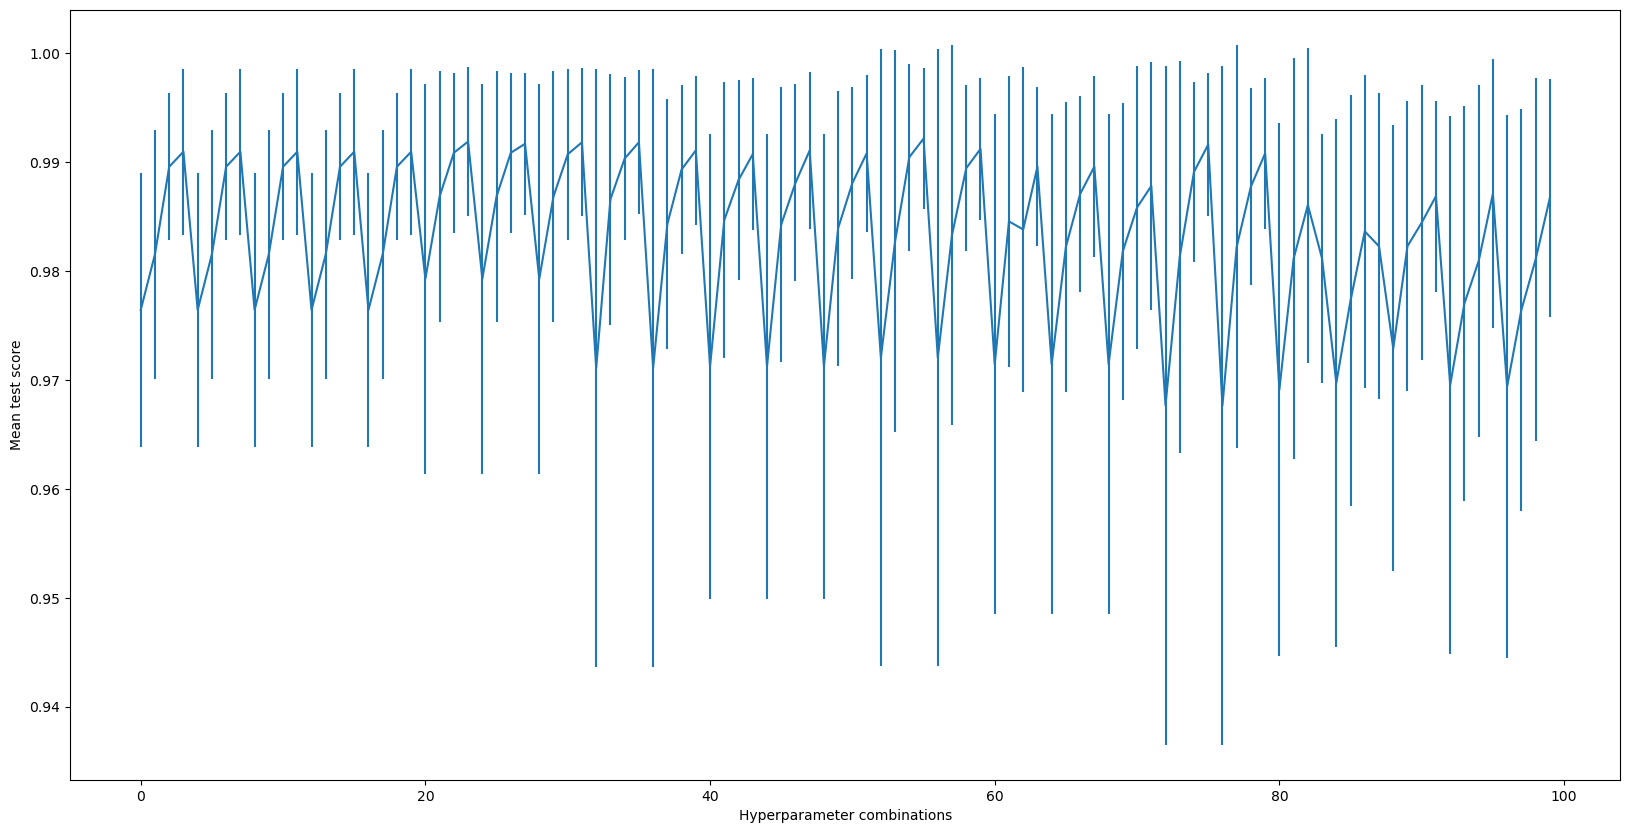

In [12]:
plt.figure(figsize=(20, 10))
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')